## **Analysis of Flip Test for Acclerometers**

This module lets you evaluate a typical flip test of accelerometers. It expects a file containing only the seismogram sections which recorded the flip test. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy import read
from obspy import UTCDateTime

#set parameters for printing final table
sernum=(9204,9207,9205,9206,9213,9211,9210)
accma=np.zeros(28).reshape(4,7)

Read file, print part of file header and plot the file

3 Trace(s) in Stream:
BK.BK69.00.HNE | 2020-10-16T21:23:00.000470Z - 2020-10-16T21:30:00.000470Z | 100.0 Hz, 42001 samples
BK.BK69.00.HNN | 2020-10-16T21:23:00.000470Z - 2020-10-16T21:30:00.000470Z | 100.0 Hz, 42001 samples
BK.BK69.00.HNZ | 2020-10-16T21:23:00.000470Z - 2020-10-16T21:30:00.000470Z | 100.0 Hz, 42001 samples


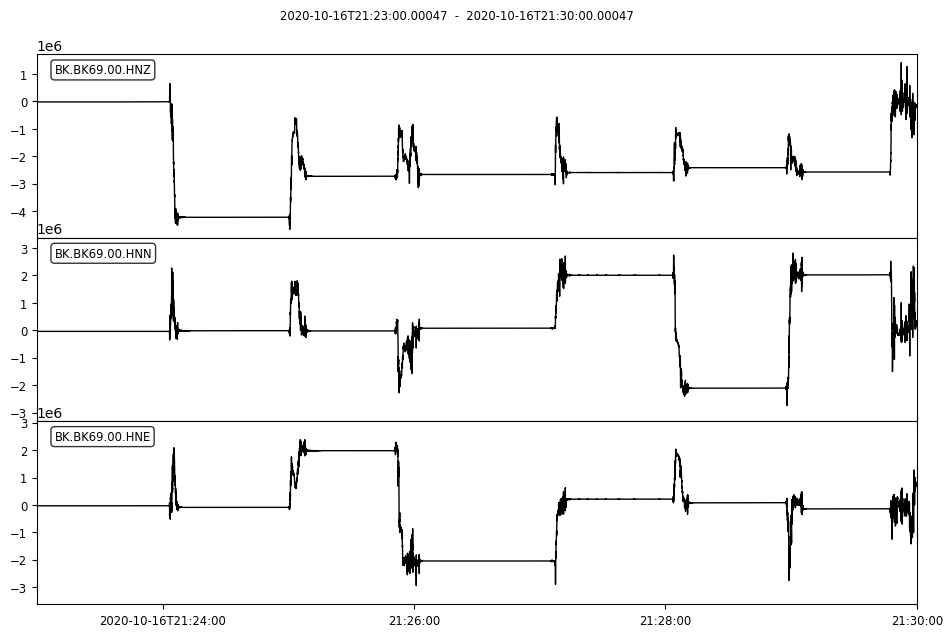

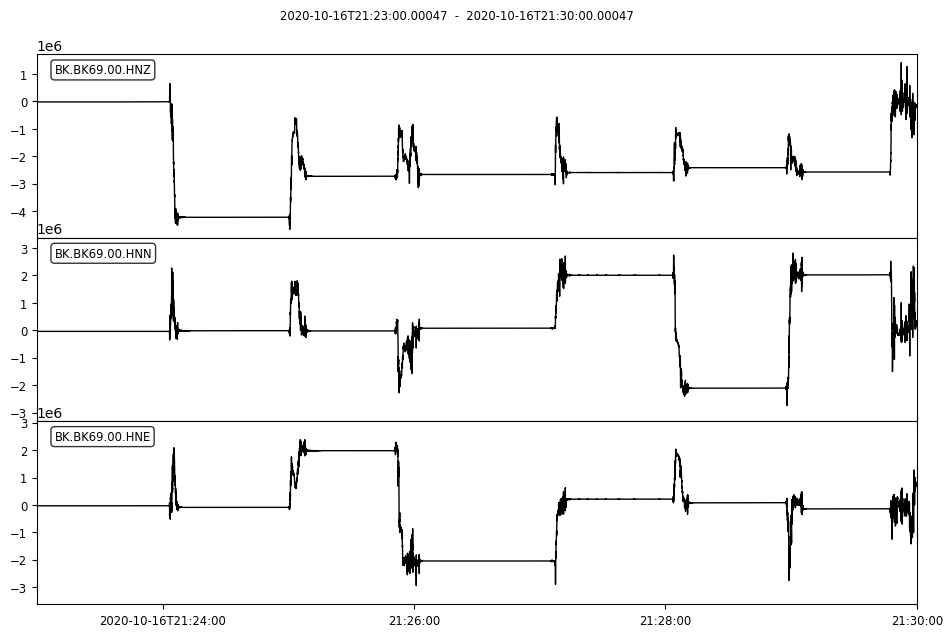

In [28]:
st = read("./../Accelerometer/Flip Test Batch 2/*69-A-Flip")
print(st.__str__(extended=True))
st.plot(color='black',size=(1000,650))

Define a custom function "acc_average" which determines the average count values for a time window of 15 sec while the accelrometer was in a stable position. This custom function will be used later.

In [14]:
def acc_average(beg,comp,d):
    tr = st[comp].slice(starttime=beg, endtime=beg+15)
    tr.plot(color= "blue")
    value=np.zeros(d)
    value=tr.data
    avg=0
    for i in range (d):
        avg=avg+value[i]/d
    #print (avg)
    return avg

Here one needs to manually determine the beginning of the time window for each up or down sequence of each component. The variables are named *compdirbeg* where *comp* is the component (Z,N,E), *dir* is the direction of the flip (ip,down) and *beg* is the beginning time of the window. Example zpbeg=beginning of the positive direction of the Z-comp. 
The custom function *acc_average* is then used to determin the average value of the counts in this window.
Lastly, the counts get converted into actual acceleration values by using the digitizers bitweight and the sensitivity of the accelerometer.

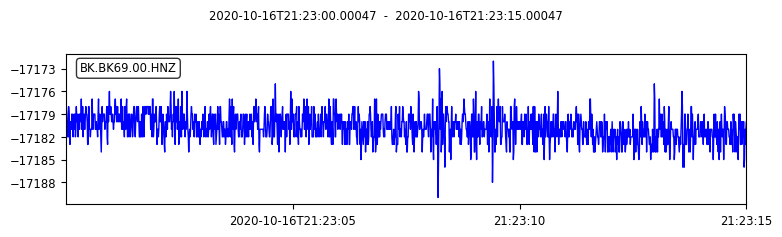

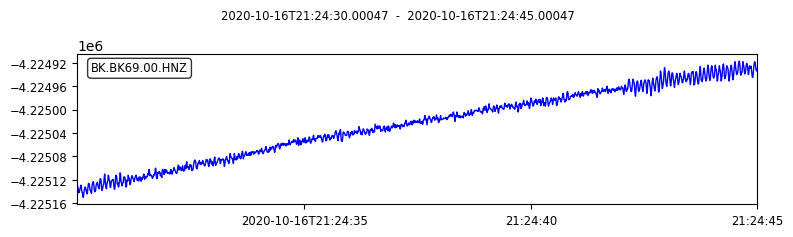

-17180.7393333 -4225025.18 2.00349533584


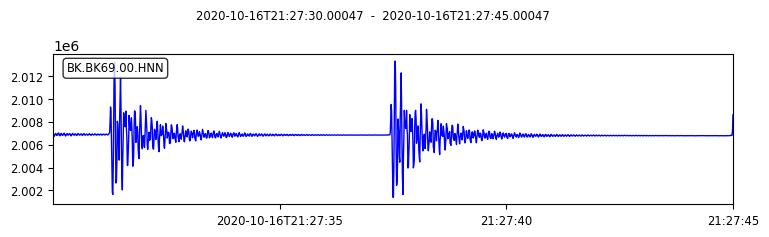

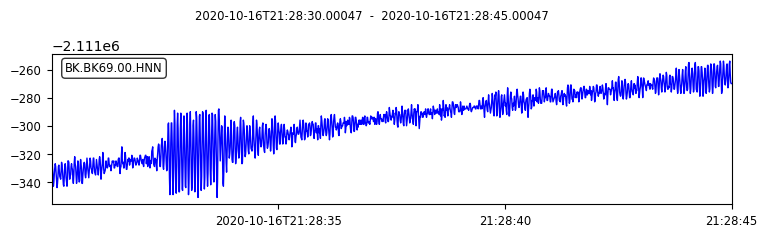

2006822.09467 -2111296.62067 1.96824278616


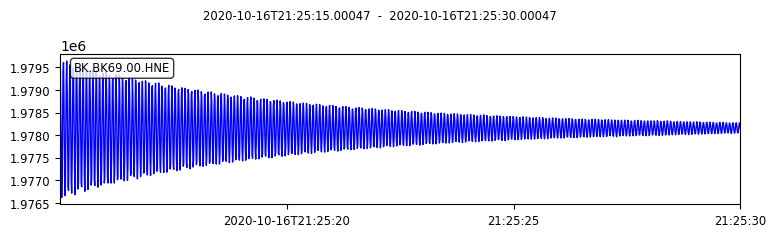

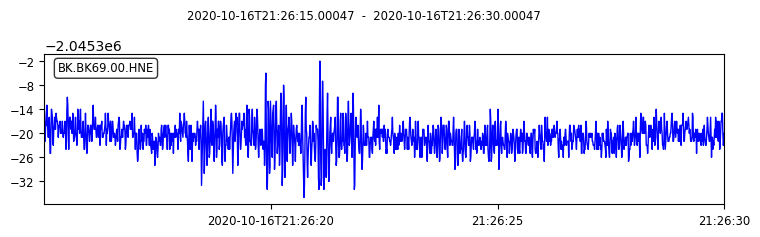

1978150.152 -2045320.836 1.92185029761


***********************
Z   flip =    2.003  g
N/S flip =    1.968  g
E/W flip =    1.922  g
***********************


In [29]:
#set length "d" of array = 15 sec window * sampling rate

d=int(15*st[0].stats.sampling_rate)

#Z-comp
comp=2
zpbeg=UTCDateTime("2020-10-16T21:23:00")
znbeg=UTCDateTime("2020-10-16T21:24:30")
avgp=acc_average(zpbeg,comp,d)
avgn=acc_average(znbeg,comp,d)
diffvolts=(avgp-avgn)*2.384*10**-6
diffgz=diffvolts/5.007
print (avgp,avgn,diffgz)

#N-comp
comp=1
npbeg=UTCDateTime("2020-10-16T21:27:30")
nnbeg=UTCDateTime("2020-10-16T21:28:30")
avgp=acc_average(npbeg,comp,d)
avgn=acc_average(nnbeg,comp,d)
diffvolts=(avgp-avgn)*2.384*10**-6
diffgn=diffvolts/4.988
print (avgp,avgn,diffgn)

#E-comp
comp=0
epbeg=UTCDateTime("2020-10-16T21:25:15")
enbeg=UTCDateTime("2020-10-16T21:26:15")
avgp=acc_average(epbeg,comp,d)
avgn=acc_average(enbeg,comp,d)
diffvolts=(avgp-avgn)*2.384*10**-6
diffge=diffvolts/4.991
print (avgp,avgn,diffge)

print()
print()

print("***********************")
print ("Z   flip = ", "%7.3f" % (diffgz), " g")
print ("N/S flip = ", "%7.3f" % (diffgn), " g")
print ("E/W flip = ", "%7.3f" % (diffge), " g")
print("***********************")

Store test results of each sensor in a 7 by 5 matrix for printing a nice table

In [30]:
name=(st[0].stats.station)
print (name)
if name=="BK63":
    array1=(name,diffgz,diffgn,diffge)
if name=="BK64":
    array2=(name,diffgz,diffgn,diffge)
if name=="BK65":
    array3=(name,diffgz,diffgn,diffge)
if name=="BK66":
    array4=(name,diffgz,diffgn,diffge)
if name=="BK67":
    array5=(name,diffgz,-diffgn,diffge)
if name=="BK68":
    array6=(name,diffgz,diffgn,diffge)
if name=="BK69":
    array7=(name,diffgz,diffgn,diffge)

print (sernum)
print (array1)
print (array2)
print (array3)
print (array4)
print (array5)
print (array6)
print (array7)

BK69
(9204, 9207, 9205, 9206, 9213, 9211, 9210)
('BK63', 2.0003959088827674, 1.9700587065511874, 1.9413683356869014)
('BK64', 2.0001466054276005, 1.9850969578401472, 1.9473690752901922)
('BK65', 1.9927660861481877, 1.9772080351456927, 1.9826896741409183)
('BK66', 1.9992782304517667, 1.9637635050628179, 1.9606079207127527)
('BK67', 2.0022573800774919, -1.9415681610884825, 1.9403723956048902)
('BK68', 2.0004354762042476, 1.9585469737203993, 1.9762029192065771)
('BK69', 2.0034953358396921, 1.9682427861577108, 1.9218502976141063)


In [37]:
accma=(array1,array2,array3,array4,array5,array6,array7)

print ("S/N  Set#   Z-comp  N-comp E-comp")
print ("              [g]    [g]     [g]")
print()


for i in range (7):
    print(sernum[i],accma[i][0],"%7.3f %7.3f %7.3f" % (accma[i][1],accma[i][2],accma[i][3]))
    

S/N  Set#   Z-comp  N-comp E-comp
              [g]    [g]     [g]

9204 BK63   2.000   1.970   1.941
9207 BK64   2.000   1.985   1.947
9205 BK65   1.993   1.977   1.983
9206 BK66   1.999   1.964   1.961
9213 BK67   2.002  -1.942   1.940
9211 BK68   2.000   1.959   1.976
9210 BK69   2.003   1.968   1.922
